<a href="https://colab.research.google.com/github/seeedata/Kaggle_Study/blob/main/231113%20Sudoku%20Solutions%20From%20Image%20Computer%20Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

import os
#os.walk(): 지정된 디렉토리부터 그 하위 디렉토리까지 모두 훑으면서 현재 디렉토리, 하위 디렉토리 목록, 파일 목록을 반환
#dirname: 현재 디렉토리의 경로
#_: 하위 디렉토리 목록. 사용하지 않음.
#filenames: 현재 디렉토리에 포함된 파일의 목록
for dirname, _, filenames in os.walk('/content/drive/MyDrive/KUCC/23-2 캐글 필사 스터디/5주차'):
    #각 파일의 이름을 가져와서 os.path.join(dirname, filename)을 사용하여 전체 파일 경로를 만든 후 출력
    for filename in filenames:
        print(os.path.join(dirname, filename))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/content/drive/MyDrive/KUCC/23-2 캐글 필사 스터디/5주차/digits/Digits/5/img006-00088.png
/content/drive/MyDrive/KUCC/23-2 캐글 필사 스터디/5주차/digits/Digits/5/img006-00103.png
/content/drive/MyDrive/KUCC/23-2 캐글 필사 스터디/5주차/digits/Digits/5/img006-00108.png
/content/drive/MyDrive/KUCC/23-2 캐글 필사 스터디/5주차/digits/Digits/5/img006-00116.png
/content/drive/MyDrive/KUCC/23-2 캐글 필사 스터디/5주차/digits/Digits/5/img006-00099.png
/content/drive/MyDrive/KUCC/23-2 캐글 필사 스터디/5주차/digits/Digits/5/img006-00112.png
/content/drive/MyDrive/KUCC/23-2 캐글 필사 스터디/5주차/digits/Digits/5/img006-00101.png
/content/drive/MyDrive/KUCC/23-2 캐글 필사 스터디/5주차/digits/Digits/5/img006-00104.png
/content/drive/MyDrive/KUCC/23-2 캐글 필사 스터디/5주차/digits/Digits/5/img006-00114.png
/content/drive/MyDrive/KUCC/23-2 캐글 필사 스터디/5주차/digits/Digits/5/img006-00119.png
/content/drive/MyDrive/KUCC/23-2 캐글 필사 스터디/5ᄌ

For this project, I am going to solve a sudoku puzzle from an image of an unsolved puzzle. The project is divided into three parts.

**Part One: Digit Classification Model**

Build and train a neural network on the Chars74K image dataset for digits. This will be further used in classifying the digits in the image.

**Part Two: Detecting And Reading The Sudoku From An Image**

Identify the sudoku puzzle in an image using OpenCV-library. Classify the digits in the detected sudoku puzzle using the model made in part one. Getting the values of the cells in the sudoku in for of array.

**Part Three: Solving The Puzzle**

The array is converted into matrix. The given puzzle is are solved using recursion.

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import cv2
from glob import glob
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from PIL import Image

# Loading Data

The dataset of images is used for building a suitable model to classify numbers in an image. Data is then specified as features(the image) and labels(the tags).

In [ ]:
data = os.listdir(r"/content/drive/MyDrive/KUCC/23-2 캐글 필사 스터디/5주차/digits/Digits"); data

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
##loading the data

#os.listdir(path): 주어진 디렉토리 경로에 있는 파일 및 서브디렉토리의 목록을 가져옴
#r은 백슬래시를 이스케이프 문자가 아닌 문자 그대로 해석. 여기선 /이라 굳이 필요가 없을 것 같긴 함.
data = os.listdir(r"/content/drive/MyDrive/KUCC/23-2 캐글 필사 스터디/5주차/digits/Digits")

data_X = []
data_y = []
data_classes = len(data)

#각 클래스(레이블)에 대해
for i in range(0, data_classes):
    #클래스에 해당하는 디렉토리 내 파일(이미지) 목록 확인
    data_list = os.listdir(r"/content/drive/MyDrive/KUCC/23-2 캐글 필사 스터디/5주차/digits/Digits" + "/" + str(i))

    #각 이미지에 대해
    for j in data_list:
        #이미지 파일 읽기
        #cv2.imread(): OpenCV(Open Source Computer Vision Library)를 사용하여 이미지 파일을 읽음
        #              BGR(Blue, Green, Red) 형식으로 이미지 반환. 반환된 넘파이 배열은 이미지의 각 픽셀에 해당하는 숫자
        pic = cv2.imread(r"/content/drive/MyDrive/KUCC/23-2 캐글 필사 스터디/5주차/digits/Digits" + "/" + str(i) + "/" + j)
        #이미지 크기 조정 (32x32 픽셀)
        pic = cv2.resize(pic, (32, 32))

        data_X.append(pic)
        data_y.append(i)

#이미지와 레이블의 길이가 일치하는지 확인
if len(data_X) == len(data_y):
    print("Total Datapoints = ", len(data_X))

data_X = np.array(data_X)
data_y = np.array(data_y)

Total Datapoints =  10160


# Splitting Dataset

- Splitting the dataset into test, train and validation sets.
- Preprocessing for the features (images) into grayscale, enhancing it with histogram equalization and then normalizing.
- Followed by converting then into a NumPy array, further reshaping the image's array and using data augmentation.
- Preprocessing for the labels involves one-hot encoding the label classes

In [ ]:
##Splitting the train, validation, and test sets

train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.05)
train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size=0.2)
print('Training Set Shape = ', train_X.shape)
print('Validation Set Shape = ', valid_X.shape)
print('Test Set Shape = ', test_X.shape)

Training Set Shape =  (7721, 32, 32, 3)
Validation Set Shape =  (1931, 32, 32, 3)
Test Set Shape =  (508, 32, 32, 3)


In [ ]:
##Preprocessing the images for neuralnet

def Prep(img):
    #making image grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #Histogram equalization (히스토그램 평활화)
    #이미지의 픽셀 강도를 조절하여 히스토그램을 균일하게 만들어줌 -> 이미지의 대비 향상
    img = cv2.equalizeHist(img)
    #normalizing
    img = img/255
    return img


train_X = np.array(list(map(Prep, train_X)))
test_X = np.array(list(map(Prep, test_X)))
valid_X= np.array(list(map(Prep, valid_X)))

In [ ]:
train_X.shape

(7721, 32, 32)

In [ ]:
##Reshaping the images

train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2], 1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2], 1)
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[1], valid_X.shape[2], 1)

In [ ]:
##Augmentation

datagen = ImageDataGenerator(width_shift_range=0.1,  #수평으로 이동할 범위
                             height_shift_range=0.1,  #수직으로 이동할 범위
                             zoom_range=0.2,  #확대 및 축소할 범위
                             shear_range=0.1,  #전단 변환
                             rotation_range=10)  #회전할 범위
datagen.fit(train_X)

전단 변환 예시
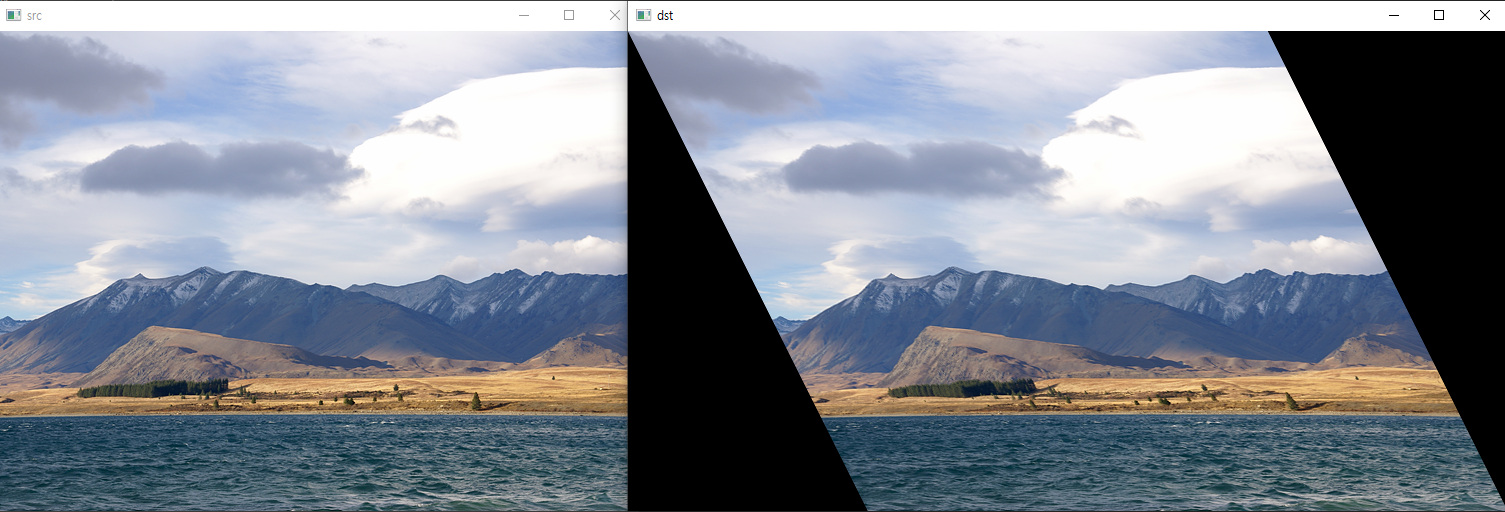

In [ ]:
##One hot encoding of the labels

train_y = to_categorical(train_y, data_classes)
test_y = to_categorical(test_y, data_classes)
valid_y = to_categorical(valid_y, data_classes)

# Model Building

For the model, I will build a convolutional neural network.

- Initializing the Convnet
- Defining by adding layers
- Compiling the Convnet
- Train the Convnet

In [ ]:
##Creating a Neural Network

model = Sequential()

model.add((Conv2D(60, (5,5), input_shape=(32,32,1), padding="same", activation='relu')))
model.add((Conv2D(60, (5,5), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add((Conv2D(30, (3,3), padding="same", activation='relu')))
model.add((Conv2D(30, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))  #strides: 풀링 윈도우 이동 간격
model.add(Dropout(0.5))  #50%의 뉴런이 무작위로 비활성화

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 60)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 30)          0         
 g2D)                                                   

In [ ]:
##Compiling the model

optimizer = RMSprop(learning_rate=0.001,
                    rho=0.9,  #이동 평균의 계수
                    epsilon=1e-08)  #분모가 0이 되는 것을 방지하기 위한 작은 상수
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

##Fit the model

history = model.fit(datagen.flow(train_X, train_y, batch_size=32),
                    epochs=30,
                    validation_data=(valid_X, valid_y),
                    verbose=2,
                    steps_per_epoch=200)  #한 번의 epoch 동안 사용되는 학습 단계의 수

Epoch 1/30
200/200 - 76s - loss: 0.8199 - accuracy: 0.7172 - val_loss: 0.1089 - val_accuracy: 0.9694 - 76s/epoch - 380ms/step
Epoch 2/30
200/200 - 75s - loss: 0.2353 - accuracy: 0.9237 - val_loss: 0.2367 - val_accuracy: 0.9156 - 75s/epoch - 376ms/step
Epoch 3/30
200/200 - 81s - loss: 0.1844 - accuracy: 0.9431 - val_loss: 0.0443 - val_accuracy: 0.9845 - 81s/epoch - 403ms/step
Epoch 4/30
200/200 - 84s - loss: 0.1579 - accuracy: 0.9508 - val_loss: 0.0418 - val_accuracy: 0.9860 - 84s/epoch - 421ms/step
Epoch 5/30
200/200 - 85s - loss: 0.1254 - accuracy: 0.9614 - val_loss: 0.0362 - val_accuracy: 0.9860 - 85s/epoch - 427ms/step
Epoch 6/30
200/200 - 75s - loss: 0.1211 - accuracy: 0.9613 - val_loss: 0.0396 - val_accuracy: 0.9871 - 75s/epoch - 375ms/step
Epoch 7/30
200/200 - 75s - loss: 0.1108 - accuracy: 0.9668 - val_loss: 0.0331 - val_accuracy: 0.9891 - 75s/epoch - 375ms/step
Epoch 8/30
200/200 - 77s - loss: 0.0883 - accuracy: 0.9719 - val_loss: 0.0255 - val_accuracy: 0.9912 - 77s/epoch - 383

In [ ]:
#Testing the model on the test set

score = model.evaluate(test_X, test_y, verbose=0)
print('Test Score = ', score[0])  #test loss
print('Test Accuracy =', score[1])

Test Score =  0.009996768087148666
Test Accuracy = 0.9960629940032959


# Reading the SUDOKU Puzzle

In this section:

- Read an image from the dataset
- Preprocess the image

_86_9948624.jpeg


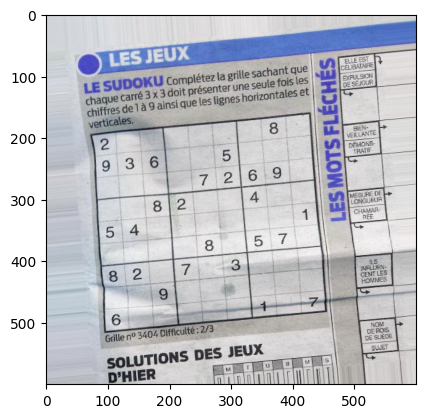

In [19]:
##Randomly select an image from the dataset

folder = r"/content/drive/MyDrive/KUCC/23-2 캐글 필사 스터디/5주차/archive (1)/aug"

a = random.choice(os.listdir(folder))
print(a)

sudoku_a = cv2.imread(folder + '/' + a)
plt.figure()
plt.imshow(sudoku_a)
plt.show()

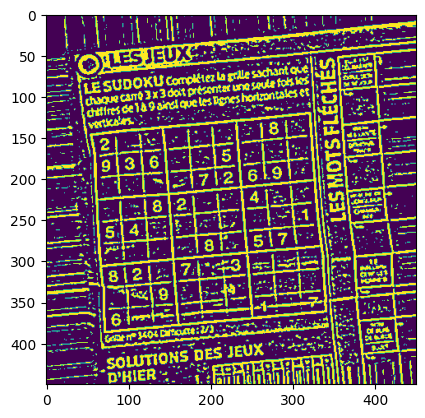

In [20]:
##Preprocessing image to be read

sudoku_a = cv2.resize(sudoku_a, (450,450))

#function to greyscale, blur and change the receptive threshold of image
def preprocess(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #가우시안 블러 적용 -> 이미지의 노이즈를 줄이고 부드럽게 만듦
    #(3,3): 커널의 크기. (width, height).
    #6: X방향으로의 가우시안 커널의 표준 편차
    blur = cv2.GaussianBlur(gray, (3,3), 6)
    #적응형 이진화: 이미지의 각 부분에 다른 임계값을 적용해 0 또는 255로 픽셀값을 변환
    #255: 임계값을 넘지 못했을 때 지정할 값
    #1: cv2.ADAPTIVE_THRESH_GAUSSIAN_C 사용해 적응형 임계값 계산
    #1: cv2.THRESH_BINARY_INV
    #11: 블록 크기
    #2: 계산된 임계값에서 빼는 상수
    threshold_img = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)
    return threshold_img

threshold = preprocess(sudoku_a)

#let's look at what we have got
plt.figure()
plt.imshow(threshold)
plt.show()

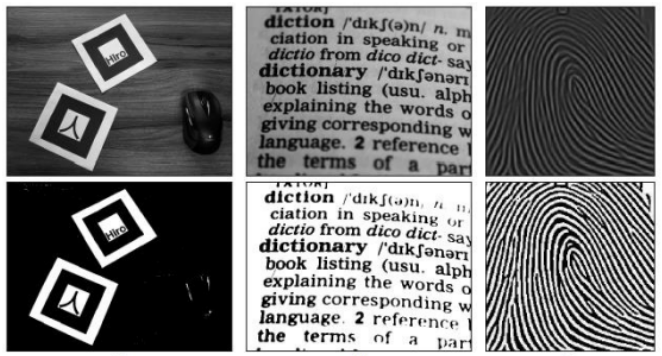

# Detecting Contour
- Detect the biggest contour of the image.
- Reshaping the outline to get the cropped and well-aligned Sudoku

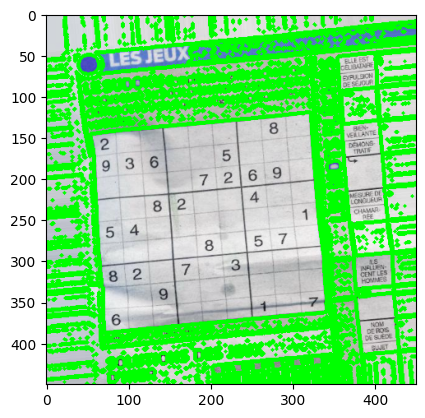

In [21]:
##Finding the outline of the sudoku puzzle in the image

contour_1 = sudoku_a.copy()
contour_2 = sudoku_a.copy()

#주어진 이진 이미지에서 외곽선을 찾음
#cv2.RETR_EXTERNAL: 외곽선 중 가장 바깥쪽의 외곽선만 찾음
#cv2.CHAIN_APPROX_SIMPLE: 외곽선을 간단한 형태로 저장하여 메모리를 절약
contour, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#찾은 외곽선을 초록색으로 그림
#-1: 모든 외곽선을 그림
#(0,255,0): 선의 색상. 초록색
#3: 선의 두께
cv2.drawContours(contour_1, contour, -1, (0,255,0), 3)

#let's see what we got
plt.figure()
plt.imshow(contour_1)
plt.show()

In [22]:
len(contour)

962

In [23]:
contour

(array([[[164, 449]]], dtype=int32),
 array([[[148, 449]],
 
        [[149, 449]]], dtype=int32),
 array([[[126, 449]],
 
        [[127, 449]]], dtype=int32),
 array([[[ 58, 449]]], dtype=int32),
 array([[[ 49, 449]],
 
        [[ 50, 449]]], dtype=int32),
 array([[[269, 448]],
 
        [[269, 449]]], dtype=int32),
 array([[[188, 447]],
 
        [[188, 448]],
 
        [[189, 449]],
 
        [[189, 447]]], dtype=int32),
 array([[[ 22, 447]]], dtype=int32),
 array([[[421, 446]],
 
        [[421, 449]]], dtype=int32),
 array([[[195, 446]],
 
        [[196, 447]],
 
        [[196, 448]],
 
        [[197, 449]],
 
        [[198, 448]],
 
        [[198, 446]]], dtype=int32),
 array([[[153, 446]],
 
        [[153, 447]],
 
        [[156, 447]],
 
        [[156, 446]]], dtype=int32),
 array([[[143, 446]],
 
        [[143, 447]]], dtype=int32),
 array([[[137, 446]],
 
        [[138, 446]]], dtype=int32),
 array([[[269, 445]],
 
        [[269, 446]]], dtype=int32),
 array([[[174, 445]]], dty

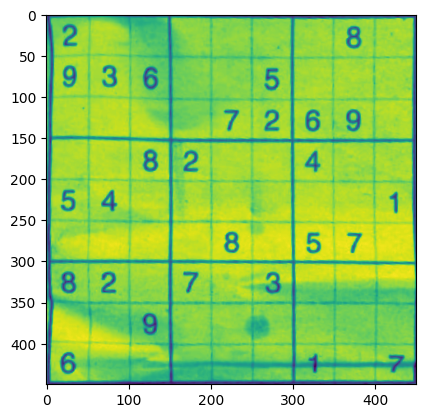

In [24]:
##윤곽선 목록에서 가장 큰 사각형의 윤곽선과 그 넓이를 찾음

def main_outline(contour):
    biggest = np.array([])
    max_area = 0
    for i in contour:  #각 윤곽선 목록에 대하여
    #현재 윤곽선 i의 넓이 계산
        area = cv2.contourArea(i)

        if area > 50:  #넓이가 50보다 큰 경우. 작은 노이즈나 불필요한 윤곽선 제거하기 위함
            #현재 윤곽선 i의 둘레 계산
            peri = cv2.arcLength(i, True)
            #윤곽선을 근사화(단순화)
            #0.02*peri: 근사화 정도를 조절하는 인자
            approx = cv2.approxPolyDP(i, 0.02*peri, True)
            #현재의 넓이가 최대 넓이보다 크고, 근사화된 윤곽선이 4개의 꼭짓점을 갖는 경우
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
    return biggest, max_area


##주어진 점들을 4개의 새로운 점으로 재구성

def reframe(points):
    points = points.reshape((4, 2))
    points_new = np.zeros((4, 1, 2), dtype = np.int32)
    #각 점의 x와 y 좌표 더해 배열 생성
    add = points.sum(1)
    #더한 값이 가장 작은 인덱스에 해당하는 점을 첫 번째 꼭짓점으로 설정
    points_new[0] = points[np.argmin(add)]
    #더한 값이 가장 큰 인덱스에 해당하는 점을 네 번째 꼭짓점으로 설정
    points_new[3] = points[np.argmax(add)]
    #x좌표와 y좌표의 차이를 계산
    diff = np.diff(points, axis =1)
    #차이가 가장 작은 인덱스에 해당하는 점을 두 번째 꼭짓점으로 설정
    points_new[1] = points[np.argmin(diff)]
    #차이가 가장 큰 인덱스에 해당하는 점을 세 번째 꼭짓점으로 설정
    points_new[2] = points[np.argmax(diff)]
    return points_new


##이미지를 9x9 그리드로 분할

def splitcells(img):
    #이미지를 수직으로 9등분하여 각 행을 나타내는 배열을 생성
    rows = np.vsplit(img,9)
    boxes = []
    for r in rows:
        #현재 행을 수평으로 9등분하여 각 열을 나타내는 배열 생성
        cols = np.hsplit(r,9)
        for box in cols:
            boxes.append(box)
    return boxes  #작은 이미지가 저장됨


#주어진 윤곽선에서 가장 큰 사각형을 찾음
biggest, maxArea = main_outline(contour)

#가장 큰 사각형이 존재하는 경우
if biggest.size != 0:
    #주어진 점들을 4개의 새로운 점으로 재구성
    biggest = reframe(biggest)
    #찾은 사각형을 contour_2 이미지에 그림
    #-1: 모든 외곽선을 그림
    #(0,255,0): 선의 색상. 초록색
    #10: 선의 두께
    cv2.drawContours(contour_2, biggest, -1, (0,255,0), 10)
    #4개의 꼭짓점 좌표를 float32 형식으로 변환
    pts1 = np.float32(biggest)
    #목표로 하는 원근 변환 결과의 꼭짓점 좌표를 float32 형식으로 지정
    pts2 = np.float32([[0,0], [450,0], [0,450], [450,450]])
    #원근 변환 행렬을 얻기 위해 원본과 목표의 좌표를 사용하여 변환 행렬을 계산
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    #계산된 원근 변환 행렬을 사용하여 이미지를 원근 변환
    imagewrap = cv2.warpPerspective(sudoku_a, matrix, (450,450))
    #원근 변환된 이미지를 흑백으로 변환
    imagewrap =cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(imagewrap)
plt.show()

원근 변환

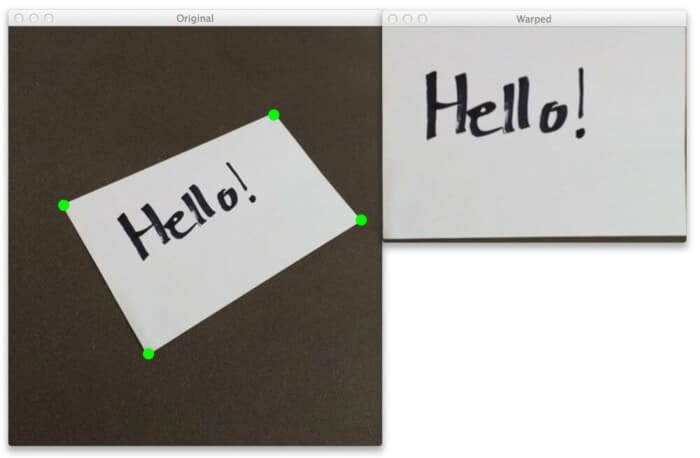

The goal of this dataset to detect the Sudoku box has been done. So yey!

However, some of the images are unfit to use in our model (some are blurr or solved). So to demonstrate solving I have created a toy dataset of one clear picture. I will be using that to run the model and solve the puzzle.

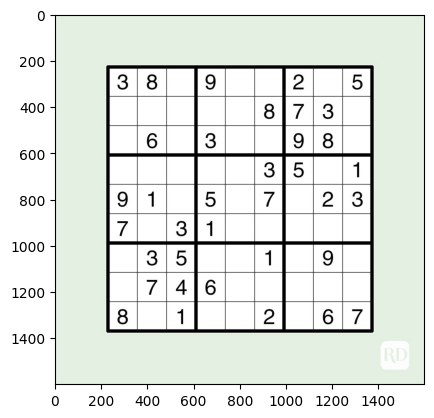

In [25]:
#Importing puzzle to be solved
puzzle = cv2.imread("/content/drive/MyDrive/KUCC/23-2 캐글 필사 스터디/5주차/su/su.jpg")

#let's see what we got
plt.figure()
plt.imshow(puzzle)
plt.show()

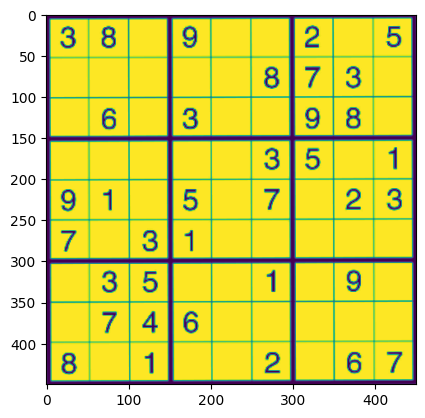

In [28]:
#Resizing puzzle to be solved
puzzle = cv2.resize(puzzle, (450,450))
#Preprocessing Puzzle
su_puzzle = preprocess(puzzle)

#Finding the outline of the sudoku puzzle in the image
su_contour_1 = su_puzzle.copy()
su_contour_2 = sudoku_a.copy()
#주어진 이진 이미지에서 외곽선을 찾음
#cv2.RETR_EXTERNAL: 외곽선 중 가장 바깥쪽의 외곽선만 찾음
#cv2.CHAIN_APPROX_SIMPLE: 외곽선을 간단한 형태로 저장하여 메모리를 절약
su_contour, hierarchy = cv2.findContours(su_puzzle, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(su_contour_1, su_contour, -1, (0,255,0), 3)


su_biggest, su_maxArea = main_outline(su_contour)
if su_biggest.size != 0:
    su_biggest = reframe(su_biggest)
    su_pts1 = np.float32(su_biggest)
    su_pts2 = np.float32([[0,0], [450,0], [0,450], [450,450]])
    su_matrix = cv2.getPerspectiveTransform(su_pts1, su_pts2)
    su_imagewrap = cv2.warpPerspective(puzzle, su_matrix, (450,450))
    su_imagewrap = cv2.cvtColor(su_imagewrap, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(su_imagewrap)
plt.show()

# Splitting the cells and Classifying digits

- Splitting the sudoku box into 81 cells with empty spaces or digits
- Cropping the cells to avoid misdetection of boundary lines as digits
- Using the model to classify the digits in the cells such that the empty cells are classified as zero
- Getting the detected output in the form of an array of 81 digits

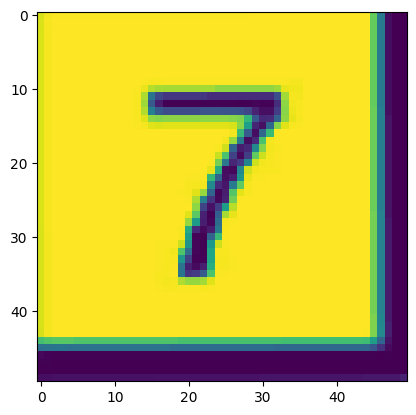

In [31]:
sudoku_cell = splitcells(su_imagewrap)

#58번째 셀 확인
plt.figure()
plt.imshow(sudoku_cell[80])
plt.show()

In [33]:
##주어진 셀 이미지들을 자르기
##The sudoku_cell's output includes the boundaries. this could lead to misclassifications by the model

def CropCell(cells):

    Cells_croped = []

    for image in cells:
        img = np.array(image)
        #특정 범위로 이미지 자르기
        img = img[4:46, 6:46]
        #다시 이미지로 변환
        img = Image.fromarray(img)
        Cells_croped.append(img)
    return Cells_croped

sudoku_cell_croped= CropCell(sudoku_cell)


#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell_croped[80])
plt.show()

In [ ]:
##스도쿠 셀 이미지들을 읽어와서 모델을 사용해 각 셀에 있는 숫자를 예측
##이를 통해 스도쿠 판의 숫자를 얻어냄

def read_cells(cell, model):

    result = []

    for image in cell:

        ##preprocess the image as it was in the model
        img = np.asarray(image)
        #이미지의 가장자리 4픽셀을 제외한 부분을 선택
        img = img[4:img.shape[0]-4, 4:img.shape[1]-4]
        img = cv2.resize(img, (32, 32))
        img = img / 255
        img = img.reshape(1, 32, 32, 1)

        ##getting predictions and setting the values if probabilities are above 65%

        #predictions에 각 클래스에 대한 확률을 저장
        predictions = model.predict(img)
        #predictions 배열에서 최대 확률을 갖는 클래스의 인덱스를 찾음
        classIndex = np.argmax(predictions, axis=-1)
        #predictions 배열에서 최대 확률값을 찾음
        probabilityValue = np.amax(predictions)

        #최대 확률값이 0.65보다 크면 해당 클래스의 인덱스를 결과 리스트에 추가
        #이는 모델이 예측을 확신하는 경우에만 해당 클래스를 선택하는 조건
        if probabilityValue > 0.65:
            result.append(classIndex[0])
        else:
            result.append(0)
    return result

grid = read_cells(sudoku_cell_croped, model)
grid = np.asarray(grid)

1/1 [==============================] - 0s 24ms/step


# Solving the sudoku

In [ ]:
#Reshaping the grid to a 9x9 matrix
grid = np.reshape(grid, (9,9))
grid

array([[3, 8, 0, 9, 0, 0, 2, 0, 5],
       [0, 0, 0, 0, 0, 8, 7, 3, 0],
       [0, 6, 0, 3, 0, 0, 9, 8, 0],
       [0, 0, 0, 0, 0, 3, 5, 0, 1],
       [9, 1, 0, 5, 0, 7, 0, 2, 3],
       [7, 0, 3, 1, 0, 0, 0, 0, 0],
       [0, 3, 5, 0, 0, 1, 0, 9, 0],
       [0, 7, 4, 6, 0, 0, 0, 0, 0],
       [8, 0, 1, 0, 0, 2, 0, 6, 7]])

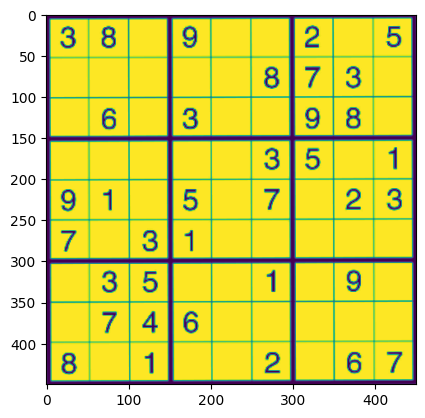

In [ ]:
#For comparing
plt.figure()
plt.imshow(su_imagewrap)
plt.show()

In [ ]:
##9x9 스도쿠 퍼즐에서 다음에 채워야 할 빈 상자의 좌표를 찾는 함수

def next_box(quiz):
    for row in range(9):
        for col in range(9):
            #현재 위치에 있는 값이 0이라면. 빈 상자라면.
            if quiz[row][col] == 0:
                return (row, col)
    #빈 상자가 더 이상 없으면 False를 반환
    return False


##주어진 숫자 'n'이 스도쿠 퍼즐의 특정 위치(row, col)에 놓일 수 있는지 여부를 확인

def possible(quiz, row, col, n):

    #주어진 행 row에 대해 0부터 8까지의 열에 대해 반복
    for i in range (0, 9):
        #같은 숫자 n이 이미 해당 행에 존재하면서, 현재 위치가 아니라면
        if quiz[row][i] == n and row != i:
            #n은 해당 위치에 놓일 수 없으므로 False를 반환
            return False

    #주어진 열 col에 대해 0부터 8까지의 행에 대해 반복
    for i in range (0, 9):
        #같은 숫자 n이 이미 해당 열에 존재하면서, 현재 위치가 아니라면
        if quiz[i][col] == n and col != i:
            #n은 해당 위치에 놓일 수 없으므로 False를 반환
            return False

    #현재 위치 (row, col)가 속한 3x3 서브그리드의 왼쪽 상단의 좌표 계산
    row0 = (row)//3
    col0 = (col)//3

    #해당 서브그리드의 행에 대해 반복
    for i in range(row0*3, row0*3+3):
        #해당 서브그리드의 열에 대해 반복
        for j in range(col0*3, col0*3+3):
            #같은 숫자 n이 이미 해당 서브그리드에 존재하면서, 현재 위치가 아니라면
            if quiz[i][j]==n and (i,j) != (row, col):
                #n은 해당 위치에 놓일 수 없으므로 False를 반환
                return False

    #모든 검사를 통과했을 경우, n은 해당 위치에 놓일 수 있으므로 True를 반환
    return True


##Recursion function to loop over untill a valid answer is found.

def solve(quiz):

    #현재 퍼즐에서 다음으로 채워야 할 빈 칸의 위치를 찾음
    val = next_box(quiz)

    #빈 칸이 더 이상 없으면 (퍼즐이 완성되었으면)
    if val is False:
        return True

    #빈 칸이 존재하면
    else:
        #해당 위치의 열과 행을 가져옴
        row, col = val
        for n in range(1,10):
            #현재 위치에 n을 놓을 수 있는지 확인하는 함수 possible가 True를 반환하면
            if possible(quiz, row, col, n):
                #해당 위치에 n을 놓는다
                quiz[row][col] = n

                #현재 퍼즐을 재귀적으로 해결
                if solve(quiz):
                    #해결이 성공했으면 True를 반환
                    return True
                else:
                    #해결이 실패했으면 현재 위치를 초기화하고 다른 숫자를 시도
                    quiz[row][col] = 0
        #모든 숫자를 시도해봤지만 해결이 실패한 경우
        return None


##스도쿠 퍼즐이 해결된 상태를 출력

def Solved(quiz):
    for row in range(9):
        #현재 행이 3의 배수이면서 0이 아닌 경우
        if row % 3 == 0 and row != 0:
            print("....................")

        for col in range(9):
            #현재 열이 3의 배수이면서 0이 아닌 경우
            if col % 3 == 0 and col != 0:
                print("|", end=" ")  #print 함수가 자동으로 줄을 바꾸지 않고 공백 문자를 출력하도록 지정
            #현재 열이 8인 경우
            if col == 8:
                #해당 숫자를 출력하고 줄을 바꿈
                print(quiz[row][col])
            else:
                #숫자와 공백을 출력
                print(str(quiz[row][col]) + " ", end="")

In [ ]:
solve(grid)

True

In [ ]:
if solve(grid):
    Solved(grid)
else:
    print("Solution don't exist. Model misread digits.")

3 8 7 | 9 4 6 | 2 1 5
5 4 9 | 2 1 8 | 7 3 6
1 6 2 | 3 7 5 | 9 8 4
....................
4 2 6 | 8 9 3 | 5 7 1
9 1 8 | 5 6 7 | 6 2 3
7 5 3 | 1 2 4 | 8 4 9
....................
6 3 5 | 7 8 1 | 4 9 2
2 7 4 | 6 3 9 | 1 5 8
8 9 1 | 4 5 2 | 3 6 7
